In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv('movies_film_digital.csv')

**Part 1**

Question: How does the use of media (film versus digital) vary between genres and over time?

In [4]:
#Top three primary genres?
movies['primary_genre'].value_counts()

Action/Adventure    550
Comedy              263
Drama               141
Horror               70
Biography            66
Crime                56
Animation            18
Documentary          12
Mystery              10
Sci-Fi                3
Fantasy               2
History               1
Romance               1
Short                 1
Family                1
Name: primary_genre, dtype: int64

In [5]:
#create a list of genres not including top three
genre = movies['primary_genre'].unique()
genre = np.delete(genre, 0)
genre = np.delete(genre, 3)
genre = np.delete(genre, 4)
genre

array(['Animation', 'Mystery', 'Biography', 'Crime', 'Horror',
       'Documentary', 'Sci-Fi', 'History', 'Romance', 'Short', 'Fantasy',
       'Family'], dtype=object)

In [6]:
#Recode primary genre to Action/Adventure, Comedy, Drama, and Other
movies['primary_genre'] = movies['primary_genre'].replace(genre, 'Other')

In [7]:
movies['primary_genre'] = movies['primary_genre'].replace('Action/Adventure', 'Action')
movies

,id,production_year,title,directors,primary_genre,genres,camera_format,negative_format,budget,inflation_adjusted_budget,budget_source,film_type
0,4103791,2006,Pirates of the Caribbean: Dead Man's Chest,"Verbinski, Gore",Action,Action|Adventure|Fantasy,"Arriflex 235, Panavision Primo Lenses|Panavisi...",35 mm,225000000,299587500.0,the-numbers,F
1,4022547,2006,Night at the Museum,"Levy, Shawn",Action,Adventure|Comedy|Family|Fantasy,"Arriflex 435, Zeiss Ultra Prime and Angenieux ...",35 mm,110000000,146465000.0,the-numbers,F
2,3415583,2006,Cars,"Lasseter, John|Ranft, Joe",Other,Animation|Comedy|Family|Sport,NaN,Digital,70000000,93205000.0,the-numbers,D
3,4587958,2006,X-Men: The Last Stand,"Ratner, Brett",Action,Action|Adventure|Fantasy|Sci-Fi|Thriller,Panavision Cameras and Lenses,35 mm,210000000,279615000.0,the-numbers,F
4,4351263,2006,The Da Vinci Code,"Howard, Ron",Other,Mystery|Thriller,"Arricam LT, Cooke S4 Lenses|Arricam ST, Cooke ...",35 mm,125000000,166437500.0,the-numbers,F
...,...,...,...,...,...,...,...,...,...,...,...,...
1190,3954779,2017,Megan Leavey,"Cowperthwaite, Gabriela",Other,Biography|Drama|War,Arri Alexa,NaN,0,0.0,the-numbers,D
1191,4375083,2017,The Greatest Showman,"Gracey, Michael",Other,Biography|Drama|Musical,Arri Alexa 65,Codex,84000000,91988400.0,the-numbers,D
1192,4367698,2016,The Founder,"Hancock, John Lee",Other,Biography|Drama|History,"Arri Alexa XT, Panavision G- Series Lenses",Codex ARRIRAW,10500000,11743200.0,the-numbers,D
1193,3342703,2017,Battle of the Sexes,"Dayton, Jonathan|Faris, Valerie",Other,Biography|Comedy|Drama|Sport,"Arricam LT, Kowa Cine Prominar prime and Angen...",35 mm,25000000,27377500.0,the-numbers,F


In [91]:
film_year = movies[['production_year', 'film_type']]
film_year.head(5)

,production_year,film_type
0,2006,F
1,2006,F
2,2006,D
3,2006,F
4,2006,F


In [137]:
genre_year = movies[['production_year','primary_genre']]
genre_year.head(5)

,production_year,primary_genre
0,2006,Action
1,2006,Action
2,2006,Other
3,2006,Action
4,2006,Other


In [174]:
film_genre = movies[['primary_genre','film_type']]
film_genre.head(5)

,primary_genre,film_type
0,Action,F
1,Action,F
2,Other,D
3,Action,F
4,Other,F


In [94]:
table = pd.crosstab(film_year['production_year'], film_year['film_type'], normalize='index')
table

film_type,D,F,FD
production_year,,,
2006,0.156250,0.770833,0.072917
2007,0.114583,0.812500,0.072917
2008,0.168317,0.742574,0.089109
2009,0.187500,0.708333,0.104167
2010,0.218750,0.656250,0.125000
2011,0.353535,0.525253,0.121212
2012,0.478261,0.369565,0.152174
2013,0.653465,0.227723,0.118812
2014,0.771429,0.133333,0.095238


In [138]:
table2 = pd.crosstab(genre_year['production_year'], genre_year['primary_genre'], normalize='index')
table2

primary_genre,Action,Comedy,Drama,Other
production_year,,,,
2006,0.367347,0.234694,0.173469,0.224490
2007,0.323232,0.262626,0.121212,0.292929
2008,0.441176,0.294118,0.137255,0.127451
2009,0.357143,0.244898,0.122449,0.275510
2010,0.480000,0.240000,0.130000,0.150000
2011,0.450980,0.284314,0.088235,0.176471
2012,0.489583,0.250000,0.104167,0.156250
2013,0.509804,0.205882,0.078431,0.205882
2014,0.528302,0.160377,0.132075,0.179245


In [175]:
table3 = pd.crosstab(film_genre['primary_genre'], film_genre['film_type'], normalize='index')
table3

film_type,D,F,FD
primary_genre,,,
Action,0.527619,0.339048,0.133333
Comedy,0.351779,0.612648,0.035573
Drama,0.364964,0.554745,0.080292
Other,0.464602,0.442478,0.092920


In [136]:
def mult_stacked_bar(table, colors = ['#628395','#46343F','#A4998E','#DDEDAA'], legend_title = '', rotation = 90, counts = [], figsize = [12,8], label_fontsize = 14, titl_fontsize = 16, spines = False, ticks = False, grid = False, title = '', xtitle = '', labels = [], filename = 'plot.png'):
    ax = table.plot.bar(stacked = True, fontsize = label_fontsize, figsize = figsize, color = colors, rot=rotation)
    if spines is False:
        [ax.spines[i].set_visible(False) for i in ax.spines]
    if ticks is False:
        ax.tick_params(size = 0)
    if grid is True:
        plt.grid(axis = 'y', color = 'black', linewidth = 0.2, linestyle = '-.')
    plt.title(title, fontsize = titl_fontsize)
    plt.xlabel(xtitle, fontsize = titl_fontsize, labelpad = 20)
    plt.legend(labels, bbox_to_anchor = [1.025, 0.5], loc = 'center left', title = legend_title, title_fontsize=titl_fontsize, markerfirst = False, fontsize = label_fontsize)
    plt.savefig(filename, bbox_inches = 'tight')
    return plt.show()

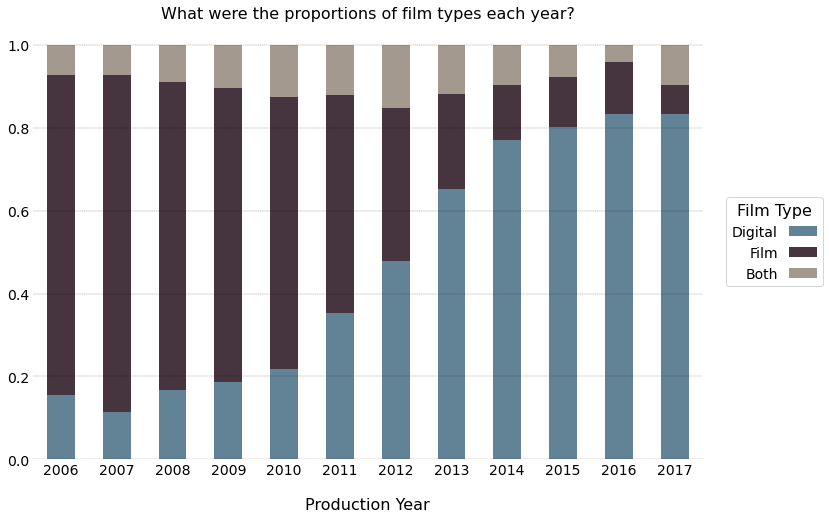

In [164]:
mult_stacked_bar(table, legend_title = 'Film Type', colors = ['#628395','#46343F', '#A4998E'], grid = True, rotation = 0, title = 'What were the proportions of film types each year?', xtitle = 'Production Year', labels = ['Digital', 'Film', 'Both'], filename = 'Film_by_Year.png')

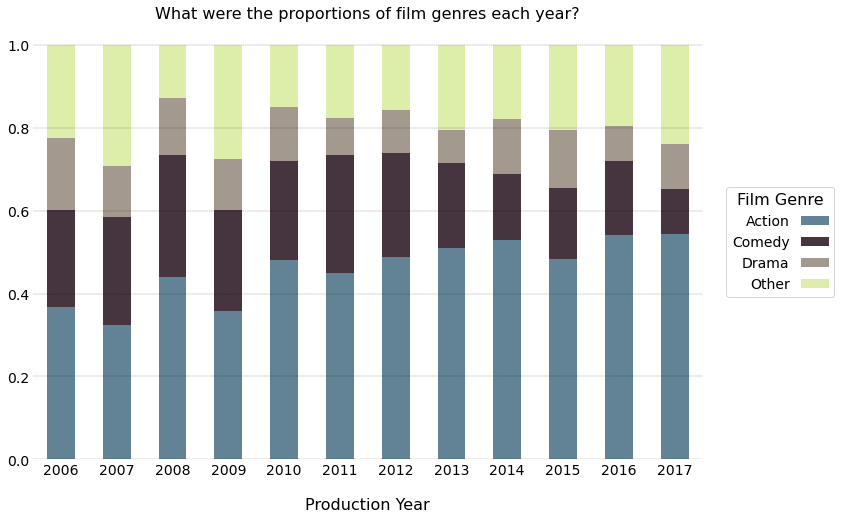

In [165]:
mult_stacked_bar(table2, legend_title = 'Film Genre', grid = True, rotation = 0, title = 'What were the proportions of film genres each year?', labels = ['Action', 'Comedy', 'Drama', 'Other'], xtitle = 'Production Year', filename = 'Genre_by_Year.png')

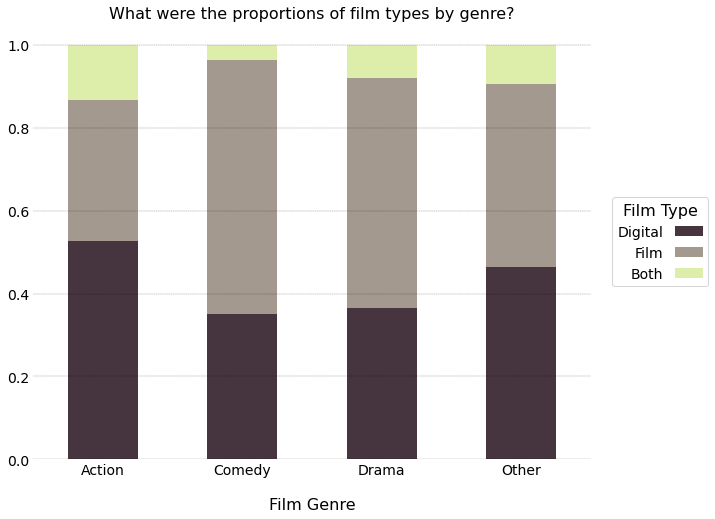

In [178]:
mult_stacked_bar(table3, legend_title = 'Film Type', rotation = 0, xtitle = 'Film Genre', grid = True, title = 'What were the proportions of film types by genre?', figsize = [10,8], colors = ['#46343F','#A4998E','#DDEDAA'], labels = ['Digital', 'Film', 'Both'], filename = 'Film_by_Genre.png')

**Part 2**

Question: How do budgets compare between movies that use film versus digital or both?

In [8]:
#make a list of budget values
budget = movies['inflation_adjusted_budget'].tolist()
scaler = (10**6)

In [9]:
#divide budget values by scaler
scaled_budget = np.divide(budget, scaler)
scaled_budget

array([299.5875 , 146.465  ,  93.205  , ...,  11.7432 ,  27.3775 ,
        11.49855])

In [10]:
#add scaled_budget column to movies df
movies['scaled_budget'] = scaled_budget
movies

,id,production_year,title,directors,primary_genre,genres,camera_format,negative_format,budget,inflation_adjusted_budget,budget_source,film_type,scaled_budget
0,4103791,2006,Pirates of the Caribbean: Dead Man's Chest,"Verbinski, Gore",Action,Action|Adventure|Fantasy,"Arriflex 235, Panavision Primo Lenses|Panavisi...",35 mm,225000000,299587500.0,the-numbers,F,299.58750
1,4022547,2006,Night at the Museum,"Levy, Shawn",Action,Adventure|Comedy|Family|Fantasy,"Arriflex 435, Zeiss Ultra Prime and Angenieux ...",35 mm,110000000,146465000.0,the-numbers,F,146.46500
2,3415583,2006,Cars,"Lasseter, John|Ranft, Joe",Other,Animation|Comedy|Family|Sport,NaN,Digital,70000000,93205000.0,the-numbers,D,93.20500
3,4587958,2006,X-Men: The Last Stand,"Ratner, Brett",Action,Action|Adventure|Fantasy|Sci-Fi|Thriller,Panavision Cameras and Lenses,35 mm,210000000,279615000.0,the-numbers,F,279.61500
4,4351263,2006,The Da Vinci Code,"Howard, Ron",Other,Mystery|Thriller,"Arricam LT, Cooke S4 Lenses|Arricam ST, Cooke ...",35 mm,125000000,166437500.0,the-numbers,F,166.43750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,3954779,2017,Megan Leavey,"Cowperthwaite, Gabriela",Other,Biography|Drama|War,Arri Alexa,NaN,0,0.0,the-numbers,D,0.00000
1191,4375083,2017,The Greatest Showman,"Gracey, Michael",Other,Biography|Drama|Musical,Arri Alexa 65,Codex,84000000,91988400.0,the-numbers,D,91.98840
1192,4367698,2016,The Founder,"Hancock, John Lee",Other,Biography|Drama|History,"Arri Alexa XT, Panavision G- Series Lenses",Codex ARRIRAW,10500000,11743200.0,the-numbers,D,11.74320
1193,3342703,2017,Battle of the Sexes,"Dayton, Jonathan|Faris, Valerie",Other,Biography|Comedy|Drama|Sport,"Arricam LT, Kowa Cine Prominar prime and Angen...",35 mm,25000000,27377500.0,the-numbers,F,27.37750


In [11]:
#make a new df that drops movies with budget=0
movies_dropped = movies[movies.scaled_budget != 0]
movies_dropped

,id,production_year,title,directors,primary_genre,genres,camera_format,negative_format,budget,inflation_adjusted_budget,budget_source,film_type,scaled_budget
0,4103791,2006,Pirates of the Caribbean: Dead Man's Chest,"Verbinski, Gore",Action,Action|Adventure|Fantasy,"Arriflex 235, Panavision Primo Lenses|Panavisi...",35 mm,225000000,299587500.0,the-numbers,F,299.58750
1,4022547,2006,Night at the Museum,"Levy, Shawn",Action,Adventure|Comedy|Family|Fantasy,"Arriflex 435, Zeiss Ultra Prime and Angenieux ...",35 mm,110000000,146465000.0,the-numbers,F,146.46500
2,3415583,2006,Cars,"Lasseter, John|Ranft, Joe",Other,Animation|Comedy|Family|Sport,NaN,Digital,70000000,93205000.0,the-numbers,D,93.20500
3,4587958,2006,X-Men: The Last Stand,"Ratner, Brett",Action,Action|Adventure|Fantasy|Sci-Fi|Thriller,Panavision Cameras and Lenses,35 mm,210000000,279615000.0,the-numbers,F,279.61500
4,4351263,2006,The Da Vinci Code,"Howard, Ron",Other,Mystery|Thriller,"Arricam LT, Cooke S4 Lenses|Arricam ST, Cooke ...",35 mm,125000000,166437500.0,the-numbers,F,166.43750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,3773879,2017,It Comes at Night,"Shults, Trey Edward",Other,Horror|Mystery,"Arri Alexa XT, Panavision Primo and Ultra Spee...",ARRIRAW,5000000,5475500.0,the-numbers,D,5.47550
1191,4375083,2017,The Greatest Showman,"Gracey, Michael",Other,Biography|Drama|Musical,Arri Alexa 65,Codex,84000000,91988400.0,the-numbers,D,91.98840
1192,4367698,2016,The Founder,"Hancock, John Lee",Other,Biography|Drama|History,"Arri Alexa XT, Panavision G- Series Lenses",Codex ARRIRAW,10500000,11743200.0,the-numbers,D,11.74320
1193,3342703,2017,Battle of the Sexes,"Dayton, Jonathan|Faris, Valerie",Other,Biography|Comedy|Drama|Sport,"Arricam LT, Kowa Cine Prominar prime and Angen...",35 mm,25000000,27377500.0,the-numbers,F,27.37750


In [12]:
action_movies = movies_dropped.loc[movies_dropped['primary_genre'] == 'Action']
comedy_movies = movies_dropped.loc[movies_dropped['primary_genre'] == 'Comedy']
drama_movies = movies_dropped.loc[movies_dropped['primary_genre'] == 'Drama']

In [13]:
action_movies

,id,production_year,title,directors,primary_genre,genres,camera_format,negative_format,budget,inflation_adjusted_budget,budget_source,film_type,scaled_budget
0,4103791,2006,Pirates of the Caribbean: Dead Man's Chest,"Verbinski, Gore",Action,Action|Adventure|Fantasy,"Arriflex 235, Panavision Primo Lenses|Panavisi...",35 mm,225000000,299587500.0,the-numbers,F,299.5875
1,4022547,2006,Night at the Museum,"Levy, Shawn",Action,Adventure|Comedy|Family|Fantasy,"Arriflex 435, Zeiss Ultra Prime and Angenieux ...",35 mm,110000000,146465000.0,the-numbers,F,146.4650
3,4587958,2006,X-Men: The Last Stand,"Ratner, Brett",Action,Action|Adventure|Fantasy|Sci-Fi|Thriller,Panavision Cameras and Lenses,35 mm,210000000,279615000.0,the-numbers,F,279.6150
5,4292783,2006,Superman Returns,"Singer, Bryan",Action,Action|Adventure|Sci-Fi,"Panavision Genesis HD Camera, Panavision Primo...",35 mm|HDCAM,232000000,308908000.0,the-numbers,FD,308.9080
7,3742737,2006,Ice Age: The Meltdown,"Saldanha, Carlos",Action,Action|Adventure|Animation|Comedy|Family|Fantasy,NaN,Digital,75000000,99862500.0,the-numbers,D,99.8625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,3609566,2017,Ferdinand,"Saldanha, Carlos",Action,Adventure|Animation|Comedy|Family|Fantasy,NaN,Digital,111000000,121556100.0,the-numbers,D,121.5561
1175,3335546,2016,Ballerina,"Maynard, Mimi|Summer, Eric|Victor-Lifton, Paul...",Action,Adventure|Animation|Comedy|Family|Musical,Panavision Cameras and Lenses,35 mm,30000000,33552000.0,the-numbers,F,33.5520
1177,4245491,2017,Sleepless,"bo Odar, Baran",Action,Action|Crime|Thriller,NaN,NaN,30000000,32853000.0,imdb,NaN,32.8530
1180,3333442,2017,Bahubali 2: The Conclusion,"Rajamouli, S.S.",Action,Action|Adventure|Drama|Fantasy,NaN,NaN,30000000,32853000.0,the-numbers,NaN,32.8530


In [14]:
comedy_movies

,id,production_year,title,directors,primary_genre,genres,camera_format,negative_format,budget,inflation_adjusted_budget,budget_source,film_type,scaled_budget
12,3443234,2006,Click,"Coraci, Frank",Comedy,Comedy|Drama|Fantasy|Romance,"Panavision Genesis HD Camera, Panavision Primo...",Video,82500000,109848750.0,the-numbers,D,109.84875
15,3382988,2006,Borat: Cultural Learnings of America for Make ...,"Charles, Larry",Comedy,Comedy,Panasonic AJ-HDC27 Varicam,Video,18000000,23967000.0,the-numbers,D,23.96700
16,4354891,2006,The Devil Wears Prada,"Frankel, David",Comedy,Comedy|Drama,"Arricam ST, Zeiss Ultra Prime and Angenieux Op...",35 mm,35000000,46602500.0,the-numbers,F,46.60250
17,4338910,2006,The Break-Up,"Reed, Peyton",Comedy,Comedy|Drama|Romance,"Panavision Panaflex Gold II, Panavision Primo ...",35 mm,52000000,69238000.0,the-numbers,F,69.23800
19,4200942,2006,Scary Movie 4,"Zucker, David",Comedy,Comedy|Horror,"Panavision Genesis HD Camera, Panavision Primo...",Video,40000000,53260000.0,the-numbers,D,53.26000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,3726769,2017,How to Be a Latin Lover,"Marino, Ken",Comedy,Comedy|Drama,NaN,NaN,10000000,10951000.0,imdb,NaN,10.95100
1166,3906582,2017,Logan Lucky,"Soderbergh, Steven",Comedy,Comedy|Crime|Drama,"Leica Summilux-C Lenses|Red Epic Dragon, Leica...",NaN,29000000,31757900.0,the-numbers,D,31.75790
1167,3717261,2017,Home Again,"Meyers-Shyer, Hallie",Comedy,Comedy|Drama|Romance,Arri Alexa,NaN,15000000,16426500.0,the-numbers,D,16.42650
1169,4380691,2017,The House,"Cohen, Andrew Jay",Comedy,Comedy,NaN,NaN,40000000,43804000.0,the-numbers,NaN,43.80400


In [17]:
drama_movies

,id,production_year,title,directors,primary_genre,genres,camera_format,negative_format,budget,inflation_adjusted_budget,budget_source,film_type,scaled_budget
18,3545177,2006,Dreamgirls,"Condon, Bill",Drama,Drama|Music|Musical,"Panavision Panaflex Millennium XL, Panavision ...",35 mm,75000000,99862500.0,the-numbers,F,99.86250
35,4584613,2006,World Trade Center,"Stone, Oliver",Drama,Drama|History|Thriller,"Arriflex 435 ES, Panavision Primo and Hylén Le...",35 mm,65000000,86547500.0,the-numbers,F,86.54750
36,4173790,2006,Rocky Balboa,"Stallone, Sylvester",Drama,Drama|Sport,"Arricam LT, Zeiss Master Prime Lenses|Arricam ...",35 mm|Video,24000000,31956000.0,the-numbers,F,31.95600
48,4373148,2006,The Good Shepherd,"De Niro, Robert",Drama,Drama|History|Thriller,"Panavision Panaflex Platinum, Panavision Primo...",35 mm,90000000,119835000.0,imdb,F,119.83500
52,3902290,2006,Little Man,"Maulucci, Damon",Drama,Drama|Short,NaN,NaN,64000000,85216000.0,the-numbers,NaN,85.21600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,3657211,2017,Gifted,"Webb, Marc",Drama,Drama,"Arricam LT, Hawk V-Lite 1.3x and Angenieux Opt...",35 mm,7000000,7665700.0,imdb,F,7.66570
1178,4345249,2017,The Circle,"Ponsoldt, James",Drama,Drama|Sci-Fi|Thriller,"Leica Summilux-C Lenses|Red Epic Dragon, Zeiss...",Redcode RAW,18000000,19711800.0,the-numbers,D,19.71180
1182,3985816,2017,Mother!,"Aronofsky, Darren",Drama,Drama|Horror|Mystery,"Arricam LT, Zeiss Ultra Prime Lenses|Arriflex ...",16 mm|35 mm|Redcode RAW,33000000,36138300.0,imdb,FD,36.13830
1185,3620138,2017,Flatliners,"Oplev, Niels Arden",Drama,Drama|Horror|Sci-Fi|Thriller,"Arri Alexa XT, Panavision Lenses",Codex ARRIRAW (2.8K),20000000,21902000.0,the-numbers,D,21.90200


In [14]:
data = action_movies['scaled_budget'].tolist()
data2 = comedy_movies['scaled_budget'].tolist()
data3 = drama_movies['scaled_budget'].tolist()

In [133]:
def make_subplot_viz(values, labels, figsize = [12,6], regsize = 12, labsize = 14, titlsize = 16, title = '', xlim = [], xtick_list = [], xlabel='', color1 = '#DDEDAA', color2 = '#46343F', grid = True, spines = False, filename = 'plot.png'):
    
    fig, ax = plt.subplots(figsize = figsize)
    ax.boxplot(values, labels = labels, vert = False, boxprops=dict(facecolor=color1, color=color2), patch_artist = True, medianprops=dict(color=color2), flierprops=dict(marker='s', markeredgecolor = color2, markerfacecolor = color1, markersize=4))
    ax.set_title(title, fontsize = titlsize, pad = 20)
    ax.set_xlabel(xlabel, fontsize = labsize, labelpad = 20)
    if xtick_list != []:
        ax.set_xticks(xtick_list)
    if grid is True:
        ax.grid(axis = 'x', color = 'black', linewidth = 0.2, linestyle = '-.')
    if spines is False:
        [ax.spines[i].set_visible(False) for i in ax.spines]
    if xlim != []:
        ax.set_xlim(xlim)
    ax.tick_params(axis = 'x', size = 0, labelsize = regsize)
    ax.tick_params(axis = 'y', size = 0, labelsize = labsize)
    
    plt.savefig(filename, bbox_inches = 'tight')
    return plt.show()

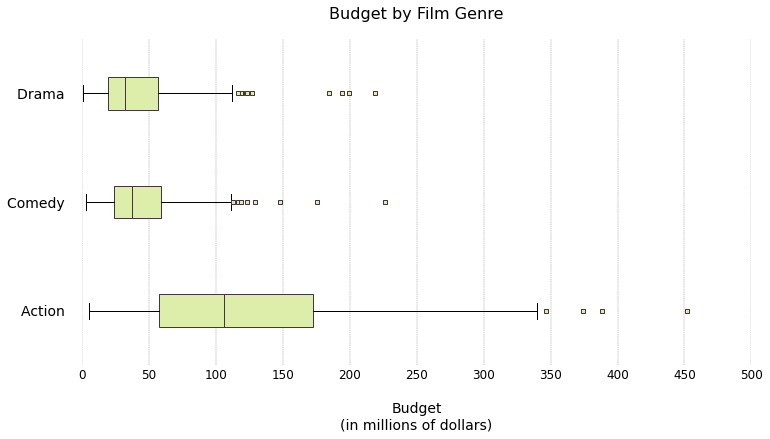

In [134]:
make_subplot_viz(values = [data,data2,data3], labels = ['Action   ','Comedy   ','Drama   '], xlabel = 'Budget\n(in millions of dollars)', title = 'Budget by Film Genre', xtick_list = [0,50,100,150,200,250,300,350,400,450,500], xlim = [0,500], filename = 'budget.png')

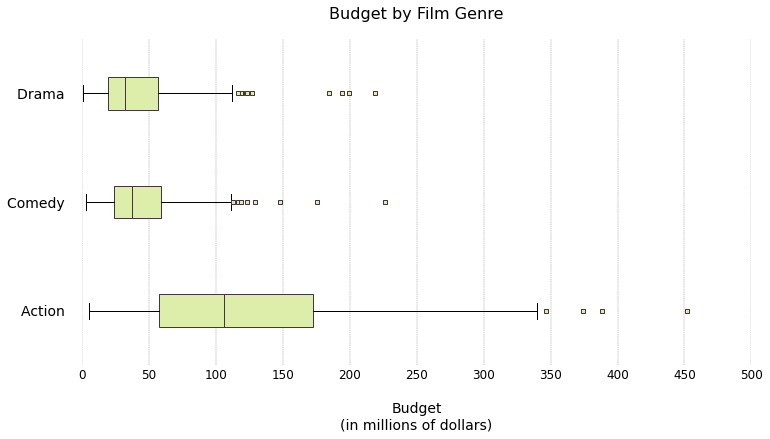

In [132]:
values = [data, data2, data3]
labels = ['Action   ','Comedy   ','Drama   ']
xlabel = 'Budget\n(in millions of dollars)'
title = 'Budget by Film Genre'
xtick_list = [0,50,100,150,200,250,300,350,400,450,500]

fig, ax = plt.subplots(figsize = [12,6])
c = '#DDEDAA'
a = '#46343F'
ax.boxplot(values, labels = labels, vert = False, boxprops=dict(facecolor=color1, color=color2), patch_artist = True, medianprops=dict(color=color2), flierprops=dict(marker='s', markeredgecolor = color2, markerfacecolor = color1, markersize=4))
ax.set_title('Budget by Film Genre', fontsize = 16, pad = 20)

ax.tick_params(axis = 'x', size = 0, labelsize = 12)
ax.tick_params(axis = 'y', size = 0, labelsize = 14)
ax.grid(axis = 'x', color = 'black', linewidth = 0.2, linestyle = '-.')

ax.set_xticks([0,50,100,150,200,250,300,350,400,450,500])
ax.set_xlabel('Budget\n(in millions of dollars)', fontsize = 14, labelpad = 20)
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.set_xlim([0,500])

plt.show()

In [ ]:
mult_stacked_bar(table2, legend_title = 'Film Genre', grid = True, rotation = 0, title = 'What were the proportions of film genres each year?', labels = ['Action','Comedy','Drama','Other'], xtitle = 'Production Year', filename = 'Genre_by_Year.png')